# Outlier Detection
## Step 1: Data Loading


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, zscore

In [56]:
# Load the dataset
df = pd.read_csv("insurance.csv")

In [58]:
# Show the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
df.shape

(1338, 7)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Box-Plot

<Axes: xlabel='bmi', ylabel='Density'>

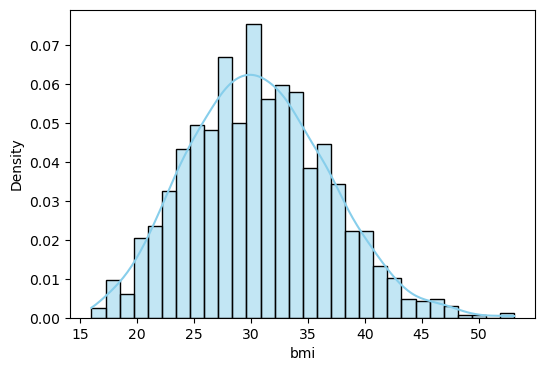

In [66]:
plt.figure(figsize=(6, 4))
sns.histplot(df['bmi'], bins=30, kde=True, color='skyblue', stat='density', edgecolor='black', label='BMI')

<Axes: xlabel='charges', ylabel='Density'>

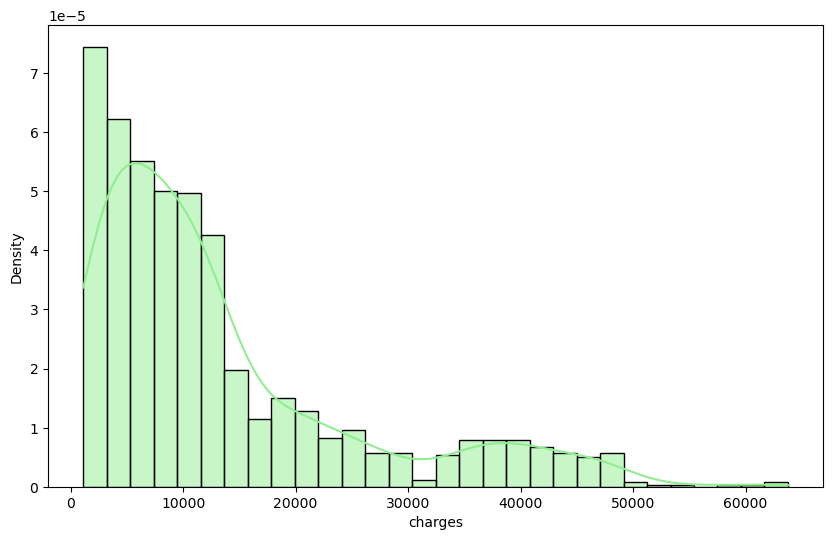

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True, color='lightgreen', stat='density', edgecolor='black', label='Charges')

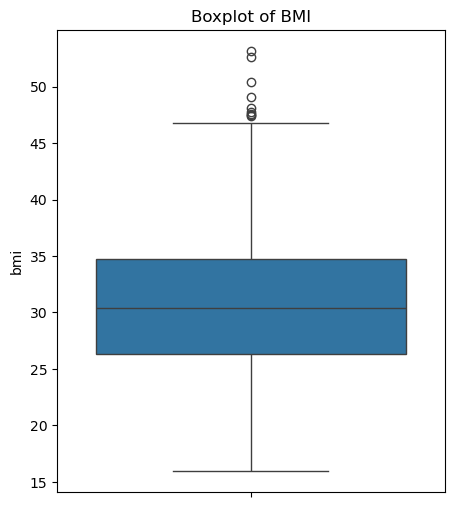

In [70]:
# Visualizing Outliers
plt.figure(figsize=(5, 6))
sns.boxplot(data=df['bmi'])
plt.title('Boxplot of BMI')
plt.show()

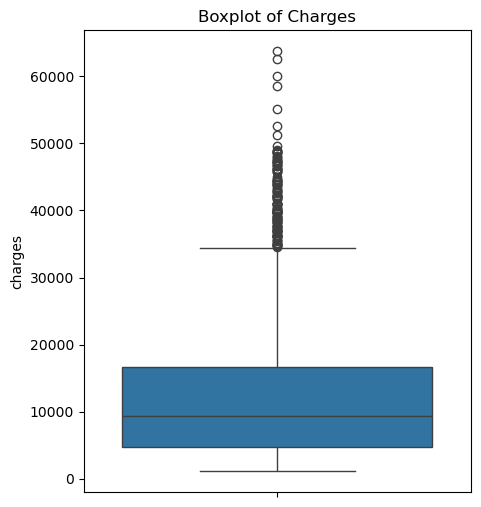

In [72]:
# Visualizing Outliers
plt.figure(figsize=(5, 6))
sns.boxplot(data=df['charges'])
plt.title('Boxplot of Charges')
plt.show()


# IQR(Inter Quartile Range)

In [74]:
# For BMI
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound:",lower_bound)
print("Upper bound:",upper_bound)
print("IQR:",IQR)

bmi_outliers = df[(df['bmi'] < (lower_bound)) | (df['bmi'] > (upper_bound))]
print(f"Number of BMI outliers detected: {len(bmi_outliers)}")

Lower bound: 13.7
Upper bound: 47.290000000000006
IQR: 8.3975
Number of BMI outliers detected: 9


In [76]:
# Detecting Outliers using IQR Method
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("IQR:",IQR)
print("Lower bound:",lower_bound)
print("Upper bound:",upper_bound)


outliers_iqr = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
print(f"\nOutliers detected using IQR method: {len(outliers_iqr)}")

IQR: 11899.625365
Lower bound: -13109.1508975
Upper bound: 34489.350562499996

Outliers detected using IQR method: 139


## Using Z-Score Method

In [80]:
# Detecting Outliers using Z-score Method
from scipy.stats import zscore
import numpy as np

#z_scores = np.abs(stats.zscore(df['charges']))

# Example: for 'bmi' column
z_scores = zscore(df['bmi'])                               #scipy.stats library
threshold =2.8                                         # usually, threshold = 3 yu can use 2.5 for strict decision
outliers = df['bmi'][(np.abs(z_scores) > threshold)]       #Take absolute value (make everything positive), Z-score greater than 3 (outliers)

print(f"Number of Outliers using Z-score method: {len(outliers)}")

Number of Outliers using Z-score method: 6


In [82]:
# Create a new column to mark if it's an outlier or not
df['bmi_outlier_zscore'] = np.where(np.abs(zscore(df['bmi'])) > 3, 'Outlier', 'Normal')

In [84]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_outlier_zscore
0,19,female,27.900,0,yes,southwest,16884.92400,Normal
1,18,male,33.770,1,no,southeast,1725.55230,Normal
2,28,male,33.000,3,no,southeast,4449.46200,Normal
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Normal
